# Data Manipulation and Analysis using Python - 7

## Regression and Clustering Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
patdf=pd.read_csv('PATIENTS.csv')
display(patdf.head())

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1
2,9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1
3,9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1
4,9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1


In [3]:
cedf=pd.read_csv('CHARTEVENTS.csv')
display(cedf.head())

/tmp/ipykernel_12699/4117324358.py:1: DtypeWarning: Columns (8,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  cedf=pd.read_csv('CHARTEVENTS.csv')


,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,5279021,40124,126179,279554.0,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,95.9,95.9,?F,0.0,0.0,NaN,NaN
1,5279022,40124,126179,279554.0,224695,2130-02-04 04:25:00,2130-02-04 05:55:00,18999,2222221.7,2222221.7,cmH2O,0.0,0.0,NaN,NaN
2,5279023,40124,126179,279554.0,220210,2130-02-04 04:30:00,2130-02-04 04:43:00,21452,15.0,15.0,insp/min,0.0,0.0,NaN,NaN
3,5279024,40124,126179,279554.0,220045,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,94.0,94.0,bpm,0.0,0.0,NaN,NaN
4,5279025,40124,126179,279554.0,220179,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,163.0,163.0,mmHg,0.0,0.0,NaN,NaN


In [4]:
ditemsdf=pd.read_csv('D_ITEMS.csv')
display(ditemsdf.head())

,row_id,itemid,label,abbreviation,dbsource,linksto,category,unitname,param_type,conceptid
0,1,1435,Sustained Nystamus,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
1,2,1436,Tactile Disturbances,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
2,3,1437,Tremor,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
3,4,1438,Ulnar Pulse [Right],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
4,5,1439,Visual Disturbances,NaN,carevue,chartevents,NaN,NaN,NaN,NaN


## Merge function

In [5]:
#documentation for merge:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html

#merging chartevents with d_items
cedf=cedf.merge(ditemsdf.loc[:,['itemid','label']],how='left',left_on='itemid',right_on='itemid')
cedf.head()

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped,label
0,5279021,40124,126179,279554.0,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,95.9,95.9,?F,0.0,0.0,NaN,NaN,Temperature Fahrenheit
1,5279022,40124,126179,279554.0,224695,2130-02-04 04:25:00,2130-02-04 05:55:00,18999,2222221.7,2222221.7,cmH2O,0.0,0.0,NaN,NaN,Peak Insp. Pressure
2,5279023,40124,126179,279554.0,220210,2130-02-04 04:30:00,2130-02-04 04:43:00,21452,15.0,15.0,insp/min,0.0,0.0,NaN,NaN,Respiratory Rate
3,5279024,40124,126179,279554.0,220045,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,94.0,94.0,bpm,0.0,0.0,NaN,NaN,Heart Rate
4,5279025,40124,126179,279554.0,220179,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,163.0,163.0,mmHg,0.0,0.0,NaN,NaN,Non Invasive Blood Pressure systolic


## Value Counts

In [6]:
#documentation for value_counts:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html

pd.DataFrame(cedf.label.value_counts())[0:20]

,count
label,
Heart Rate,15490
Respiratory Rate,15086
Heart Rhythm,14509
O2 saturation pulseoxymetry,8053
calprevflg,7349
SpO2,7262
Code Status,7125
Ectopy Type 1,6962
Ectopy Type,6942


In [7]:
#
#to find all the 'height' items, you could look for full/partial string matching, using regex, look online if others have already done the work
unqlabels=pd.Series(cedf.label.unique())
unqlabels[unqlabels.str.contains('height',case=False,na=False)]

96            Height
97       Height (cm)
399    Height of Bed
dtype: object

In [8]:
#here's all the height and weight itemids
w_itemids=[763,3580]
h_itemids=[226707,226730]

In [9]:
#using another column to identify the items we care about
cedf['ITEM']=None
cedf.loc[cedf.itemid.isin(w_itemids) & cedf.valuenum.notnull(),'ITEM']='Weight'
cedf.loc[cedf.itemid.isin(h_itemids) & cedf.valuenum.notnull(),'ITEM']='Height'

In [10]:

cedf.head()
cedf.ITEM

#121 rows x 16 columns
cedf.loc[cedf['ITEM'] == 'Height']
#239 rows x 16 columns
cedf.loc[cedf['ITEM'] == 'Weight']



,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped,label,ITEM
102133,85803880,10011,105331,232110.0,763,2126-08-14 21:00:00,2126-08-15 00:39:00,21570,57.700000762939453,57.700001,kg,NaN,NaN,NaN,NotStopd,Daily Weight,Weight
104123,85805870,10011,105331,232110.0,763,2126-08-18 10:00:00,2126-08-18 11:52:00,20808,62,62.000000,kg,NaN,NaN,NaN,NotStopd,Daily Weight,Weight
107430,85809177,10011,105331,232110.0,763,2126-08-23 03:00:00,2126-08-23 03:01:00,21570,60,60.000000,kg,NaN,NaN,NaN,NotStopd,Daily Weight,Weight
109870,85811617,10011,105331,232110.0,763,2126-08-27 04:00:00,2126-08-27 04:31:00,21570,56.200000762939453,56.200001,kg,NaN,NaN,NaN,NotStopd,Daily Weight,Weight
111038,85814409,10013,165520,264446.0,763,2125-10-04 23:30:00,2125-10-04 23:39:00,21570,95,95.000000,kg,NaN,NaN,NaN,NotStopd,Daily Weight,Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339899,86334545,10126,160445,249805.0,763,2171-08-15 07:00:00,2171-08-15 07:18:00,19263,109.80000305175781,109.800003,kg,NaN,NaN,NaN,NotStopd,Daily Weight,Weight
341525,86336171,10126,160445,249805.0,763,2171-08-16 06:30:00,2171-08-16 07:34:00,19263,112.19999694824219,112.199997,kg,NaN,NaN,NaN,NotStopd,Daily Weight,Weight
349519,86344165,10127,182839,271544.0,763,2198-07-04 04:00:00,2198-07-04 06:31:00,16707,68.199996948242188,68.199997,kg,NaN,NaN,NaN,NotStopd,Daily Weight,Weight
350024,86344670,10127,182839,271544.0,763,2198-07-04 15:00:00,2198-07-04 15:39:00,18522,0,0.000000,kg,NaN,NaN,NaN,NotStopd,Daily Weight,Weight


In [11]:
#all weights are in kg
cedf.loc[cedf.ITEM=='Weight','valueuom'].unique()

array(['kg'], dtype=object)

In [12]:
#heights are in inches and cm
cedf.loc[cedf.ITEM=='Height','valueuom'].unique()

array(['Inch', 'cm'], dtype=object)

In [13]:
#convert inches to cm
#heights are in inches and cm
inchidx=(cedf.ITEM=='Height') & (cedf.valueuom!='cm')
cedf.loc[inchidx,'valuenum']=cedf.loc[inchidx,'valuenum']*2.54
cedf.loc[inchidx,'valueuom']='cm'

In [14]:
cedf.head()

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped,label,ITEM
0,5279021,40124,126179,279554.0,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,95.9,95.9,?F,0.0,0.0,NaN,NaN,Temperature Fahrenheit,None
1,5279022,40124,126179,279554.0,224695,2130-02-04 04:25:00,2130-02-04 05:55:00,18999,2222221.7,2222221.7,cmH2O,0.0,0.0,NaN,NaN,Peak Insp. Pressure,None
2,5279023,40124,126179,279554.0,220210,2130-02-04 04:30:00,2130-02-04 04:43:00,21452,15.0,15.0,insp/min,0.0,0.0,NaN,NaN,Respiratory Rate,None
3,5279024,40124,126179,279554.0,220045,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,94.0,94.0,bpm,0.0,0.0,NaN,NaN,Heart Rate,None
4,5279025,40124,126179,279554.0,220179,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,163.0,163.0,mmHg,0.0,0.0,NaN,NaN,Non Invasive Blood Pressure systolic,None


In [15]:
#documentation for pivot table
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html

#most people have weight, some people have multiple heights, some people have no heights
pivotdf=cedf.pivot_table(values='valuenum',index=['subject_id','charttime'],columns='ITEM')
pivotdf

ITEM                            Height     Weight
subject_id charttime                             
10011      2126-08-14 21:00:00     NaN  57.700001
           2126-08-18 10:00:00     NaN  62.000000
           2126-08-23 03:00:00     NaN  60.000000
           2126-08-27 04:00:00     NaN  56.200001
10013      2125-10-04 23:30:00     NaN  95.000000
...                                ...        ...
44083      2112-05-06 12:27:00  172.86        NaN
           2112-05-23 13:31:00  157.24        NaN
           2112-05-29 02:08:00  172.86        NaN
44212      2123-11-26 11:42:00  157.24        NaN
44222      2180-07-19 08:53:00  177.90        NaN

[134 rows x 2 columns]

In [16]:
#documentation for groupby
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

#first, let's take the mean height and weight per subject
meandf=pivotdf.groupby('subject_id').mean()
meandf

ITEM,Height,Weight
subject_id,,
10011,NaN,58.975000
10013,NaN,95.000000
10019,NaN,105.300003
10026,NaN,64.900002
10027,NaN,54.340000
...,...,...
43881,190.750000,NaN
43927,147.160000,NaN
44083,167.653333,NaN


In [17]:
#mean-imputing
meandf.loc[meandf.Height.isnull(),'Height']=meandf.Height.mean()
meandf.loc[meandf.Weight.isnull(),'Weight']=meandf.Weight.mean()

In [18]:

print(meandf.Weight.mean())
print(meandf.Height.mean())


76.5130788253379
165.3449462365591


In [19]:
meandf

ITEM,Height,Weight
subject_id,,
10011,165.344946,58.975000
10013,165.344946,95.000000
10019,165.344946,105.300003
10026,165.344946,64.900002
10027,165.344946,54.340000
...,...,...
43881,190.750000,76.513079
43927,147.160000,76.513079
44083,167.653333,76.513079


In [20]:
#bmi is [weight in kg] / [height in m]^2
meandf['BMI']=meandf['Weight']/(meandf['Height']/100)**2
meandf

ITEM,Height,Weight,BMI
subject_id,,,
10011,165.344946,58.975000,21.571786
10013,165.344946,95.000000,34.748955
10019,165.344946,105.300003,38.516475
10026,165.344946,64.900002,23.739024
10027,165.344946,54.340000,19.876403
...,...,...,...
43881,190.750000,76.513079,21.028417
43927,147.160000,76.513079,35.331015
44083,167.653333,76.513079,27.221452


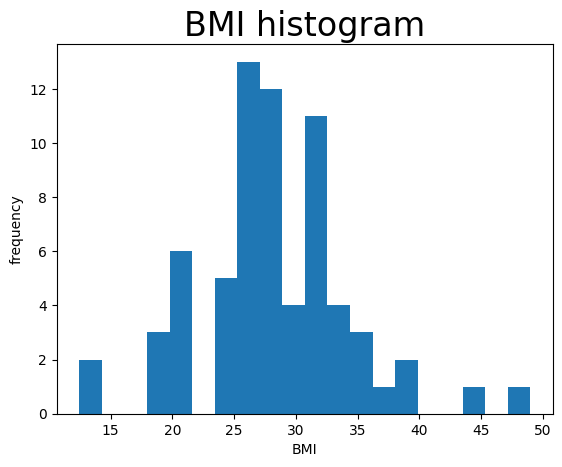

In [21]:
#histogram of BMI
plt.hist(meandf['BMI'],bins=20)
plt.title('BMI histogram',fontsize=24)
plt.xlabel('BMI')
plt.ylabel('frequency')
plt.show()

In [22]:
meandf.shape

(68, 3)

## Feature Generation for Regression and Clustering

In [23]:
# adding more variables from patdf and admitdf

admitdf=pd.read_csv('ADMISSIONS.csv')
display(admitdf.head())

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1


In [24]:
print(patdf.shape)
print(admitdf.shape)
#print(datadf.shape)
Sampledf=admitdf.loc[:,['subject_id','admission_type','admission_location','religion','insurance','marital_status','ethnicity','hospital_expire_flag']]
print(Sampledf.shape)

(100, 8)
(129, 19)
(129, 8)


In [25]:
patdf.head()

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1
2,9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1
3,9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1
4,9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1


In [26]:
Sampledf.head()

,subject_id,admission_type,admission_location,religion,insurance,marital_status,ethnicity,hospital_expire_flag
0,10006,EMERGENCY,EMERGENCY ROOM ADMIT,CATHOLIC,Medicare,SEPARATED,BLACK/AFRICAN AMERICAN,0
1,10011,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CATHOLIC,Private,SINGLE,UNKNOWN/NOT SPECIFIED,1
2,10013,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CATHOLIC,Medicare,NaN,UNKNOWN/NOT SPECIFIED,1
3,10017,EMERGENCY,EMERGENCY ROOM ADMIT,CATHOLIC,Medicare,DIVORCED,WHITE,0
4,10019,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CATHOLIC,Medicare,DIVORCED,WHITE,1


In [27]:
#merging patient dataframe with admisison dataframe
datadf=patdf.loc[:,['subject_id','gender']].merge(admitdf.loc[:,['subject_id','admission_type','admission_location','religion','insurance','marital_status','ethnicity','hospital_expire_flag']],how='left',on='subject_id')
print(datadf.shape)

datadf.head()

(129, 9)


,subject_id,gender,admission_type,admission_location,religion,insurance,marital_status,ethnicity,hospital_expire_flag
0,10006,F,EMERGENCY,EMERGENCY ROOM ADMIT,CATHOLIC,Medicare,SEPARATED,BLACK/AFRICAN AMERICAN,0
1,10011,F,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CATHOLIC,Private,SINGLE,UNKNOWN/NOT SPECIFIED,1
2,10013,F,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CATHOLIC,Medicare,NaN,UNKNOWN/NOT SPECIFIED,1
3,10017,F,EMERGENCY,EMERGENCY ROOM ADMIT,CATHOLIC,Medicare,DIVORCED,WHITE,0
4,10019,M,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CATHOLIC,Medicare,DIVORCED,WHITE,1


In [28]:
#merging bmi dataframe with resultant dataframe
datadf=meandf.merge(datadf,how='left',right_on='subject_id',left_index=True)
print(datadf.shape)
datadf.head()

(97, 12)


,Height,Weight,BMI,subject_id,gender,admission_type,admission_location,religion,insurance,marital_status,ethnicity,hospital_expire_flag
1,165.344946,58.975000,21.571786,10011,F,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CATHOLIC,Private,SINGLE,UNKNOWN/NOT SPECIFIED,1
2,165.344946,95.000000,34.748955,10013,F,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CATHOLIC,Medicare,NaN,UNKNOWN/NOT SPECIFIED,1
4,165.344946,105.300003,38.516475,10019,M,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CATHOLIC,Medicare,DIVORCED,WHITE,1
5,165.344946,64.900002,23.739024,10026,F,EMERGENCY,EMERGENCY ROOM ADMIT,OTHER,Medicare,NaN,WHITE,0
6,165.344946,54.340000,19.876403,10027,F,ELECTIVE,PHYS REFERRAL/NORMAL DELI,CATHOLIC,Medicare,MARRIED,WHITE,0


In [29]:
#documentation on get dummies
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
def onehotify(dfin,colin):
    return pd.concat([dfin,pd.get_dummies(dfin[colin],prefix=colin)],axis=1).drop([colin],axis=1)

In [30]:
#setting subject id as index
datadf=datadf.set_index('subject_id')

In [31]:
datadf.shape

(97, 11)

In [32]:
datadf.head()

,Height,Weight,BMI,gender,admission_type,admission_location,religion,insurance,marital_status,ethnicity,hospital_expire_flag
subject_id,,,,,,,,,,,
10011,165.344946,58.975000,21.571786,F,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CATHOLIC,Private,SINGLE,UNKNOWN/NOT SPECIFIED,1
10013,165.344946,95.000000,34.748955,F,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CATHOLIC,Medicare,NaN,UNKNOWN/NOT SPECIFIED,1
10019,165.344946,105.300003,38.516475,M,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CATHOLIC,Medicare,DIVORCED,WHITE,1
10026,165.344946,64.900002,23.739024,F,EMERGENCY,EMERGENCY ROOM ADMIT,OTHER,Medicare,NaN,WHITE,0
10027,165.344946,54.340000,19.876403,F,ELECTIVE,PHYS REFERRAL/NORMAL DELI,CATHOLIC,Medicare,MARRIED,WHITE,0


In [33]:
#one-hotifying each categorical column
for curcol in ['gender', 'admission_type','admission_location', 'insurance', 'religion','marital_status', 'ethnicity']:
    datadf=onehotify(datadf,curcol)

In [34]:
datadf

,Height,Weight,BMI,hospital_expire_flag,gender_F,gender_M,admission_type_ELECTIVE,admission_type_EMERGENCY,admission_type_URGENT,admission_location_CLINIC REFERRAL/PREMATURE,...,marital_status_WIDOWED,ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,ethnicity_ASIAN,ethnicity_BLACK/AFRICAN AMERICAN,ethnicity_HISPANIC OR LATINO,ethnicity_HISPANIC/LATINO - PUERTO RICAN,ethnicity_OTHER,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE
subject_id,,,,,,,,,,,,,,,,,,,,,
10011,165.344946,58.975000,21.571786,1,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
10013,165.344946,95.000000,34.748955,1,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
10019,165.344946,105.300003,38.516475,1,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
10026,165.344946,64.900002,23.739024,0,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
10027,165.344946,54.340000,19.876403,0,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44083,167.653333,76.513079,27.221452,0,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
44083,167.653333,76.513079,27.221452,0,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
44083,167.653333,76.513079,27.221452,0,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [35]:
#taking out hospital expire flag so we can use it as outcome (y)
ydf=datadf['hospital_expire_flag']
xdf=datadf.drop('hospital_expire_flag',axis=1)

#for certain algorithms, standardizing data is a requirement
scaledxdf=(xdf-xdf.mean())/xdf.std()

#### Standarization/Normalzation

In [36]:
#for certain algorithms, standardizing the feature matrix is needed
scaledxdf=(xdf-xdf.mean())/xdf.std()

# Code for Normalization
#scaledxdf=(xdf-xdf.min())/(xdf.max()-xdf.min())

In [37]:
display(scaledxdf.head())
display(ydf.head())

,Height,Weight,BMI,gender_F,gender_M,admission_type_ELECTIVE,admission_type_EMERGENCY,admission_type_URGENT,admission_location_CLINIC REFERRAL/PREMATURE,admission_location_EMERGENCY ROOM ADMIT,...,marital_status_WIDOWED,ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,ethnicity_ASIAN,ethnicity_BLACK/AFRICAN AMERICAN,ethnicity_HISPANIC OR LATINO,ethnicity_HISPANIC/LATINO - PUERTO RICAN,ethnicity_OTHER,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE
subject_id,,,,,,,,,,,,,,,,,,,,,
10011,-0.200041,-1.178776,-1.044468,1.091846,-1.091846,-0.231921,0.277445,-0.144345,-0.355793,-1.162658,...,-0.373793,-0.144345,-0.101535,-0.206319,-0.101535,-0.425489,-0.144345,-0.101535,3.318179,-1.354193
10013,-0.200041,1.194069,1.163715,1.091846,-1.091846,-0.231921,0.277445,-0.144345,-0.355793,-1.162658,...,-0.373793,-0.144345,-0.101535,-0.206319,-0.101535,-0.425489,-0.144345,-0.101535,3.318179,-1.354193
10019,-0.200041,1.872495,1.795062,-0.906438,0.906438,-0.231921,0.277445,-0.144345,-0.355793,-1.162658,...,-0.373793,-0.144345,-0.101535,-0.206319,-0.101535,-0.425489,-0.144345,-0.101535,-0.298263,0.730834
10026,-0.200041,-0.788516,-0.681290,1.091846,-1.091846,-0.231921,0.277445,-0.144345,-0.355793,0.851231,...,-0.373793,-0.144345,-0.101535,-0.206319,-0.101535,-0.425489,-0.144345,-0.101535,-0.298263,0.730834
10027,-0.200041,-1.484068,-1.328574,1.091846,-1.091846,4.267354,-3.567155,-0.144345,-0.355793,-1.162658,...,-0.373793,-0.144345,-0.101535,-0.206319,-0.101535,-0.425489,-0.144345,-0.101535,-0.298263,0.730834


subject_id
10011    1
10013    1
10019    1
10026    0
10027    0
Name: hospital_expire_flag, dtype: int64

# Regression

In [38]:
import sklearn
#reference for sklearn:
#http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

from sklearn import linear_model
#reference for linear regression
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
linmodel=linear_model.LinearRegression()

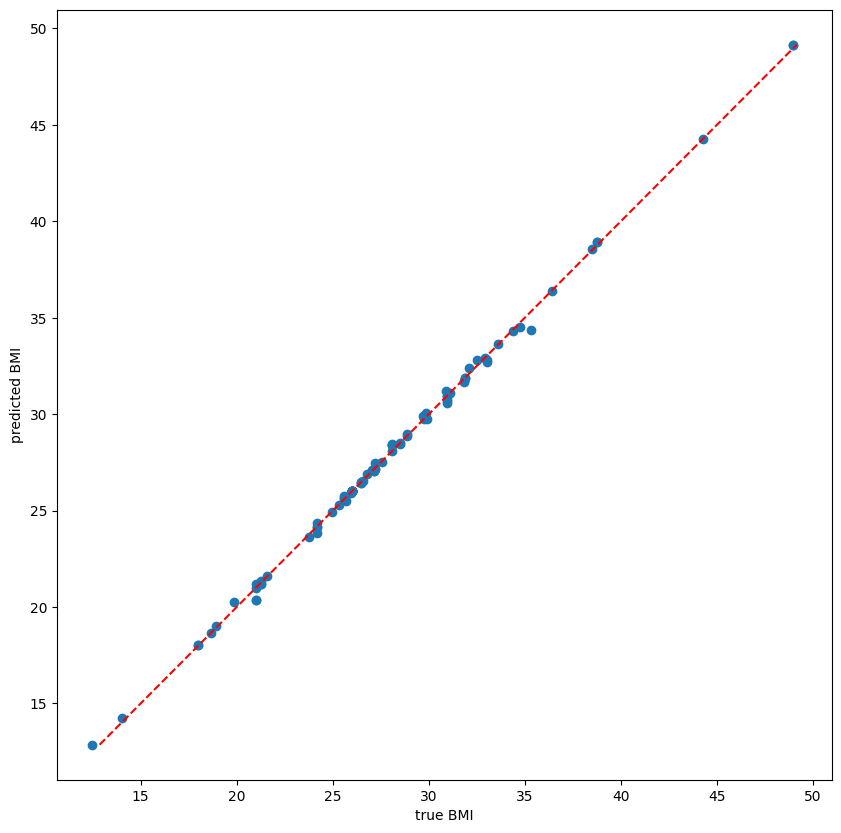

In [39]:
#so what do we want to predict? let's try BMI
predcol='BMI'
linmodel.fit(xdf.drop(predcol,axis=1),xdf[predcol])
#generate predictions based on the model
ypred=linmodel.predict(xdf.drop(predcol,axis=1))

#now let's plot it to see how good they are
plt.rcParams['figure.figsize']=[10.,10.]
plt.scatter(xdf[predcol],ypred)
plt.plot([ypred.min(),ypred.max()],[ypred.min(),ypred.max()],'r--')
plt.xlabel('true BMI')
plt.ylabel('predicted BMI')
plt.show()

# Classification

In [40]:
#documentation for logistic regression:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
logmodel=linear_model.LogisticRegression()

In [41]:
logmodel.fit(xdf,ydf)

ypred=logmodel.predict(xdf)


/home/duyhoa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluation of ML models

In [42]:
# Reading: https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234 
# Sklearn documentation for model evaluation metrics:
# http://scikit-learn.org/stable/modules/classes.html

from sklearn.metrics import accuracy_score #Metric scoring functions

accuracy_score(ydf, ypred)



0.7835051546391752

In [43]:
# AUROC - The area under the receiver operating characteristic (AUROC) 
# is a performance metric that you can use to evaluate classification models.
ypred2=logmodel.predict_proba(xdf)

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(ydf, ypred2[:,1])
AUROC=metrics.roc_auc_score(ydf, ypred2[:,1])

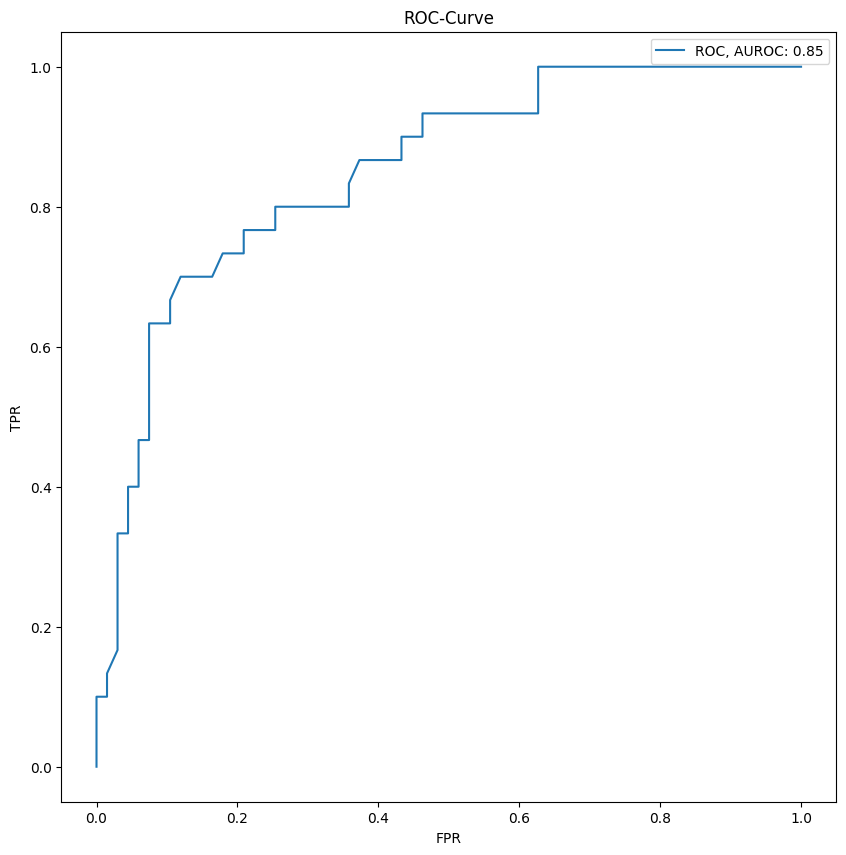

In [44]:
plt.plot(fpr,tpr,label='ROC, AUROC: {:.3}'.format(AUROC))
plt.title('ROC-Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [45]:
#feature importance
#keep in mind that we're using just the demo dataset, hence some of the results may not be very informative


fi=pd.DataFrame(logmodel.coef_).transpose()
fi.index=xdf.columns
fi.columns=['coef']
fi['abs_coef']=abs(fi['coef'])
fi.sort_values(by='abs_coef',ascending=False)[0:10]

,coef,abs_coef
marital_status_DIVORCED,1.050082,1.050082
ethnicity_HISPANIC/LATINO - PUERTO RICAN,-1.006071,1.006071
marital_status_UNKNOWN (DEFAULT),-0.940677,0.940677
admission_type_ELECTIVE,-0.722211,0.722211
religion_OTHER,-0.676178,0.676178
ethnicity_UNABLE TO OBTAIN,0.631140,0.631140
insurance_Medicaid,0.630835,0.630835
admission_type_EMERGENCY,0.581403,0.581403
insurance_Private,-0.567100,0.567100
insurance_Medicare,-0.529862,0.529862


# Clustering 

In [46]:
#documentation for k-means:
#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn import cluster
kmeans=cluster.KMeans(n_clusters=3)
clusters=kmeans.fit_predict(scaledxdf)
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/home/duyhoa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Dimension Reduction

In [47]:
#documentation for PCA:
#http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
from sklearn import decomposition
pca=decomposition.PCA(n_components=2)
xdf_pca=pca.fit_transform(scaledxdf)

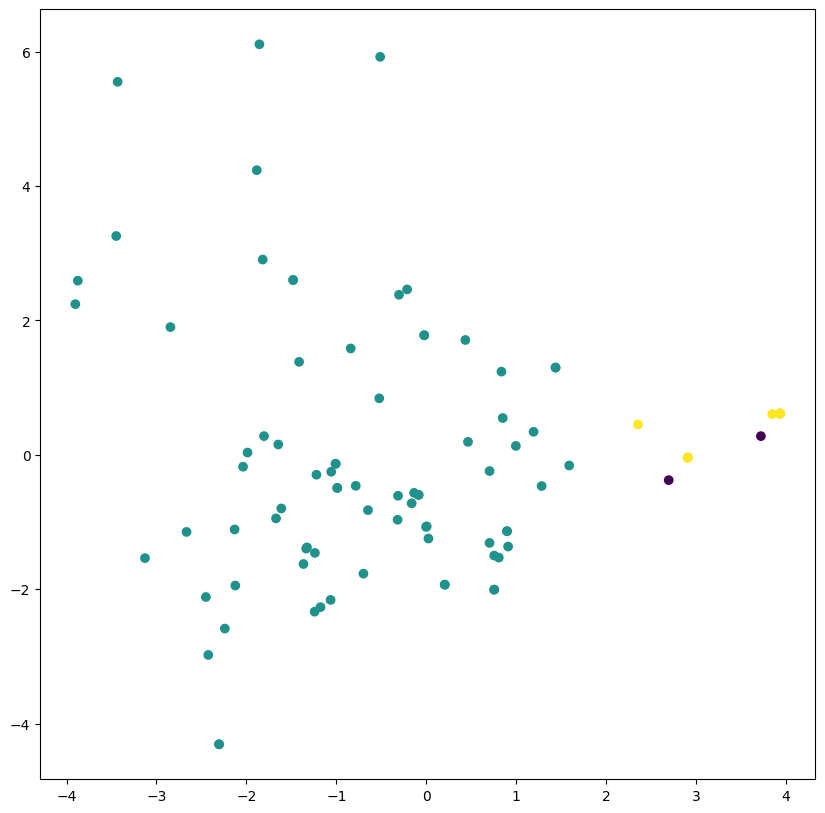

In [48]:
#coloring based on kmeans
plt.scatter(xdf_pca[:,0],xdf_pca[:,1],c=clusters)
plt.show()

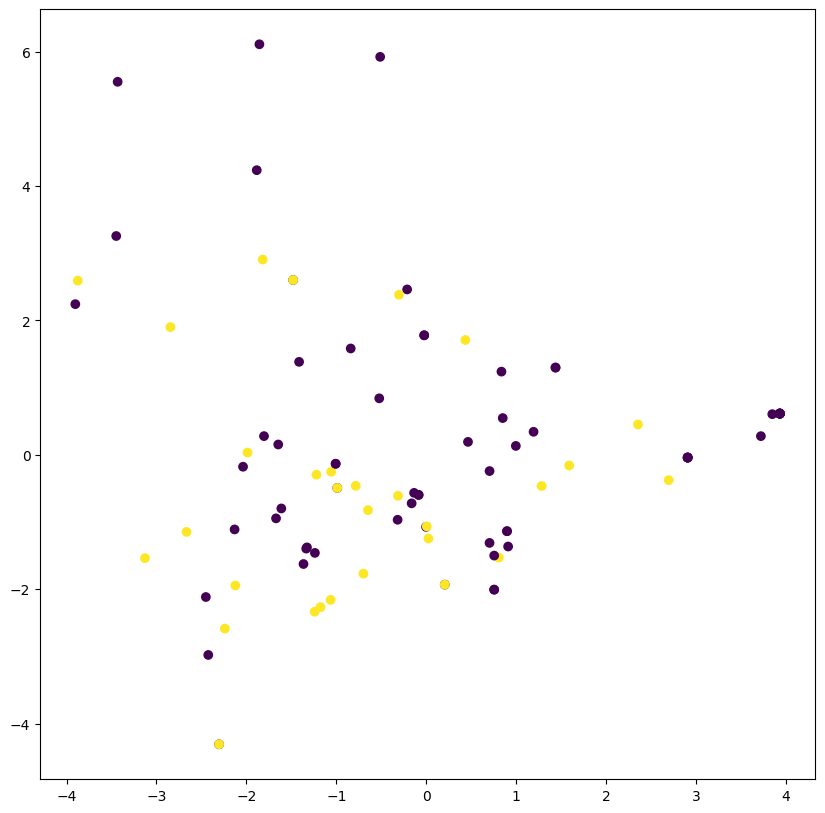

In [49]:
#coloring based on mortality
plt.scatter(xdf_pca[:,0],xdf_pca[:,1],c=ydf)
plt.show()

In [50]:
#documentation for t-SNE:
#http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
from sklearn import manifold
tsne=manifold.TSNE(n_components=2)
xdf_tsne=tsne.fit_transform(scaledxdf)

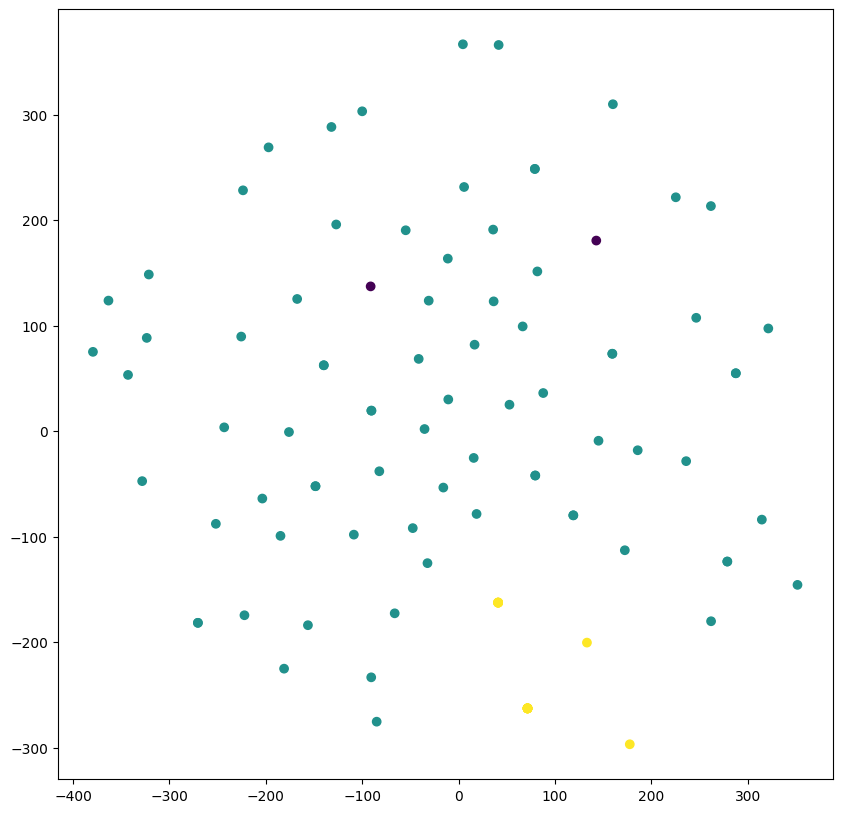

In [51]:
#coloring based on kmeans
plt.scatter(xdf_tsne[:,0],xdf_tsne[:,1],c=clusters)
plt.show()

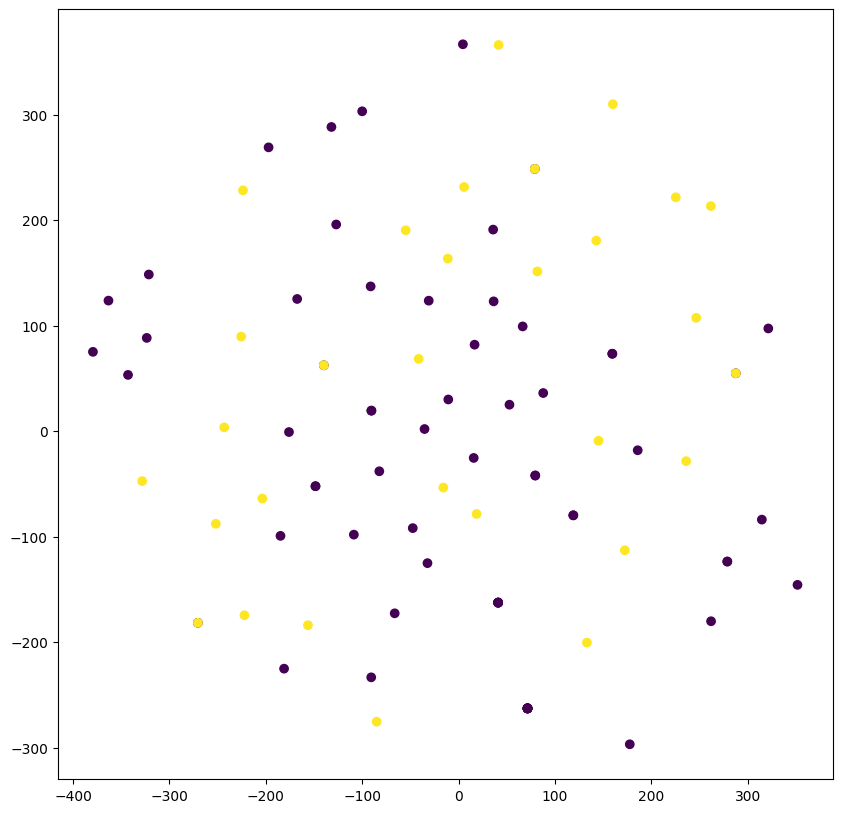

In [52]:
#coloring based on mortality
plt.scatter(xdf_tsne[:,0],xdf_tsne[:,1],c=ydf)
plt.show()